In [13]:
import pickle
import numpy as np
import pandas as pd 
from scipy.ndimage import gaussian_filter1d
import pingouin as pg 
from tabulate import tabulate


import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

import sys 
sys.path.append("..") 
from utils.bms import fit_bms
from utils.viz import viz
from utils.analyze import build_pivot_table
viz.get_style()

In [ ]:
a = 1 
b = 1
c = a + b 

In [17]:
def show_bms(data_set, models = ['MOS', 'FLR', 'RP', 'MOS_fix', 'FLR_fix', 'RP_fix'], 
             n_param =[18, 15, 9, 6, 6, 3]):
    '''group-level bayesian model selection
    '''
    
    ticks = [f'{m}({n})' for n, m in zip(n_param, models)]
    fit_sub_info = []

    for i, m in enumerate(models):
        with open(f'../fits/{data_set}/fit_sub_info-{m}-bms.pkl', 'rb')as handle:
            fit_info = pickle.load(handle)
        # get the subject list 
        if i==0: subj_lst = fit_info.keys() 
        # get log post
        log_post = [fit_info[idx]['log_post'] for idx in subj_lst]
        bic      = [fit_info[idx]['bic'] for idx in subj_lst]
        h        = [fit_info[idx]['H'] for idx in subj_lst]
        n_param  = fit_info[list(subj_lst)[0]]['n_param']
        fit_sub_info.append({
            'log_post': log_post, 
            'bic': bic, 
            'n_param': n_param, 
            'H': h
        })

    bms_results = fit_bms(fit_sub_info)

    # show protected exceedence 
    _, ax = plt.subplots(1, 1, figsize=(5, 4))
    xx = list(range(len(models)))
    sns.barplot(x=xx, y=bms_results['pxp'], palette=viz.Palette[:len(models)], ax=ax)
    ax.set_xticks(xx)
    ax.set_xticklabels(ticks, rotation=30, fontsize=13)
    ax.set_xlim([0-.8, len(models)-1+.8])
    ax.set_ylabel('PXP')
    plt.tight_layout()

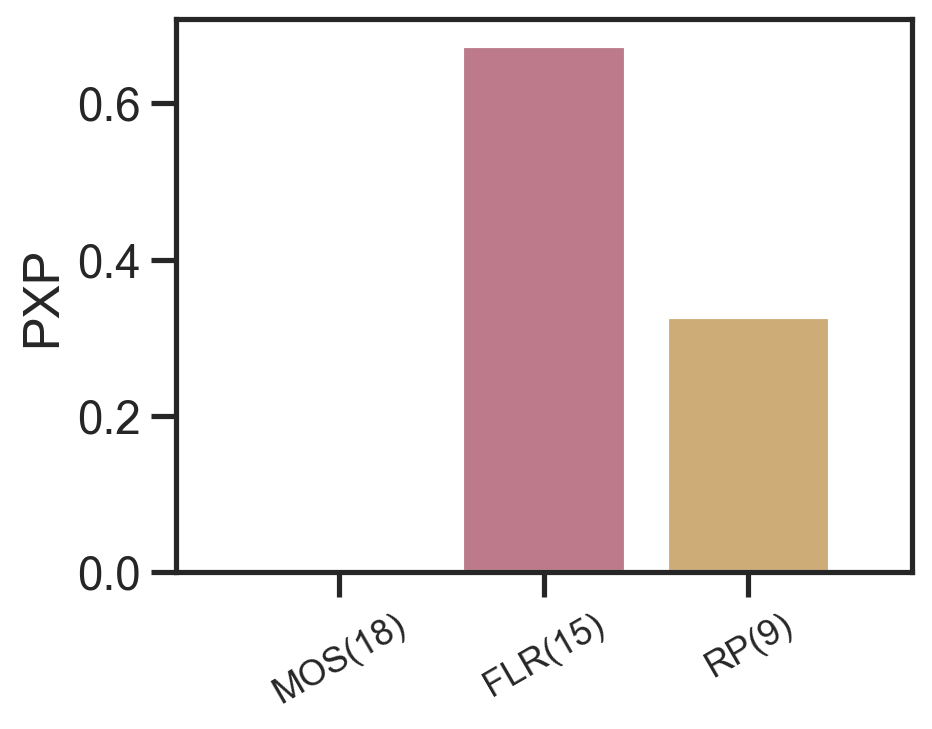

In [21]:
show_bms('exp1data', models=['MOS', 'FLR', 'RP'])

MOS(18) nll: 156.879, aic: 349.758, bic: 418.999
FLR(15) nll: 163.310, aic: 356.619, bic: 414.320
RP(9) nll: 174.883, aic: 367.766, bic: 402.386
MOS_fix(6) nll: 169.774, aic: 351.548, bic: 374.629


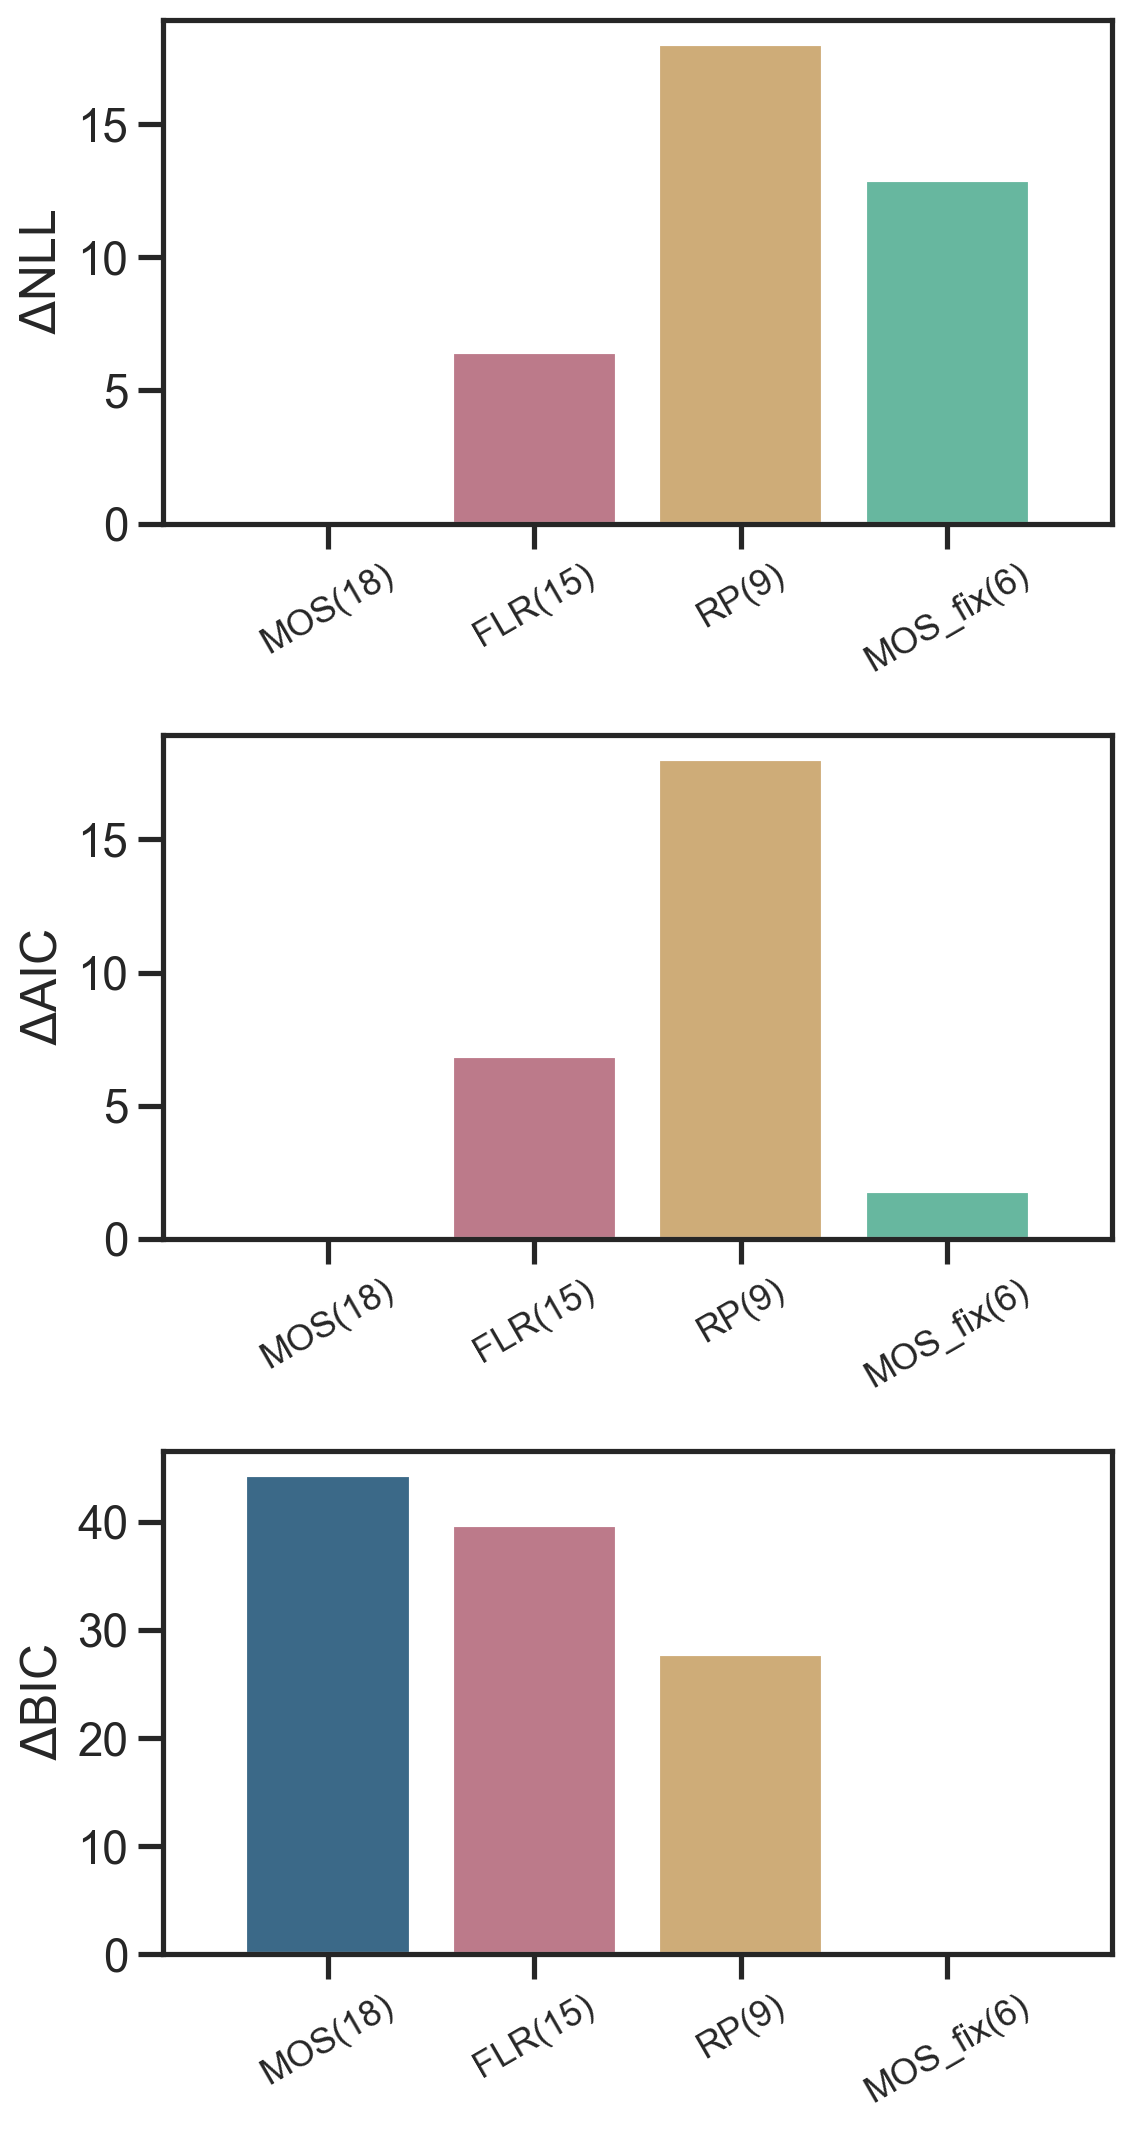

In [16]:
quantTable('exp1data', agents=['MOS', 'FLR', 'RP', 'MOS_fix'])

## Recover MOS

In [11]:
quantTable('exp1data-MOS', agents=['MOS', 'FLR', 'RP', 'MOS_fix'])

FileNotFoundError: [Errno 2] No such file or directory: '../fits/exp1data-MOS/params-exp1data-MOS-MOS_fix-bms-ind.csv'

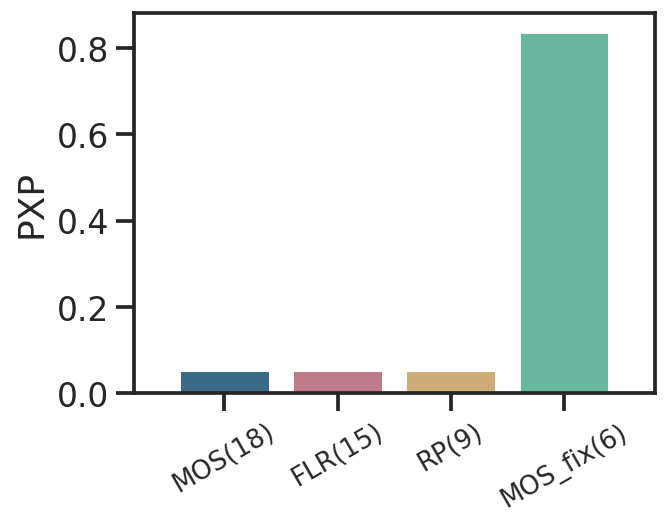

In [ ]:
show_bms('exp1data-MOS', models=['MOS', 'FLR', 'RP', 'MOS_fix'])

## Recover FLR

MOS(18) nll: 413.036, aic: 862.072, bic: 948.515
FLR(15) nll: 404.757, aic: 839.514, bic: 911.549
RP(9) nll: 453.887, aic: 925.775, bic: 968.996
MOS_fix(6) nll: 418.181, aic: 848.363, bic: 877.177


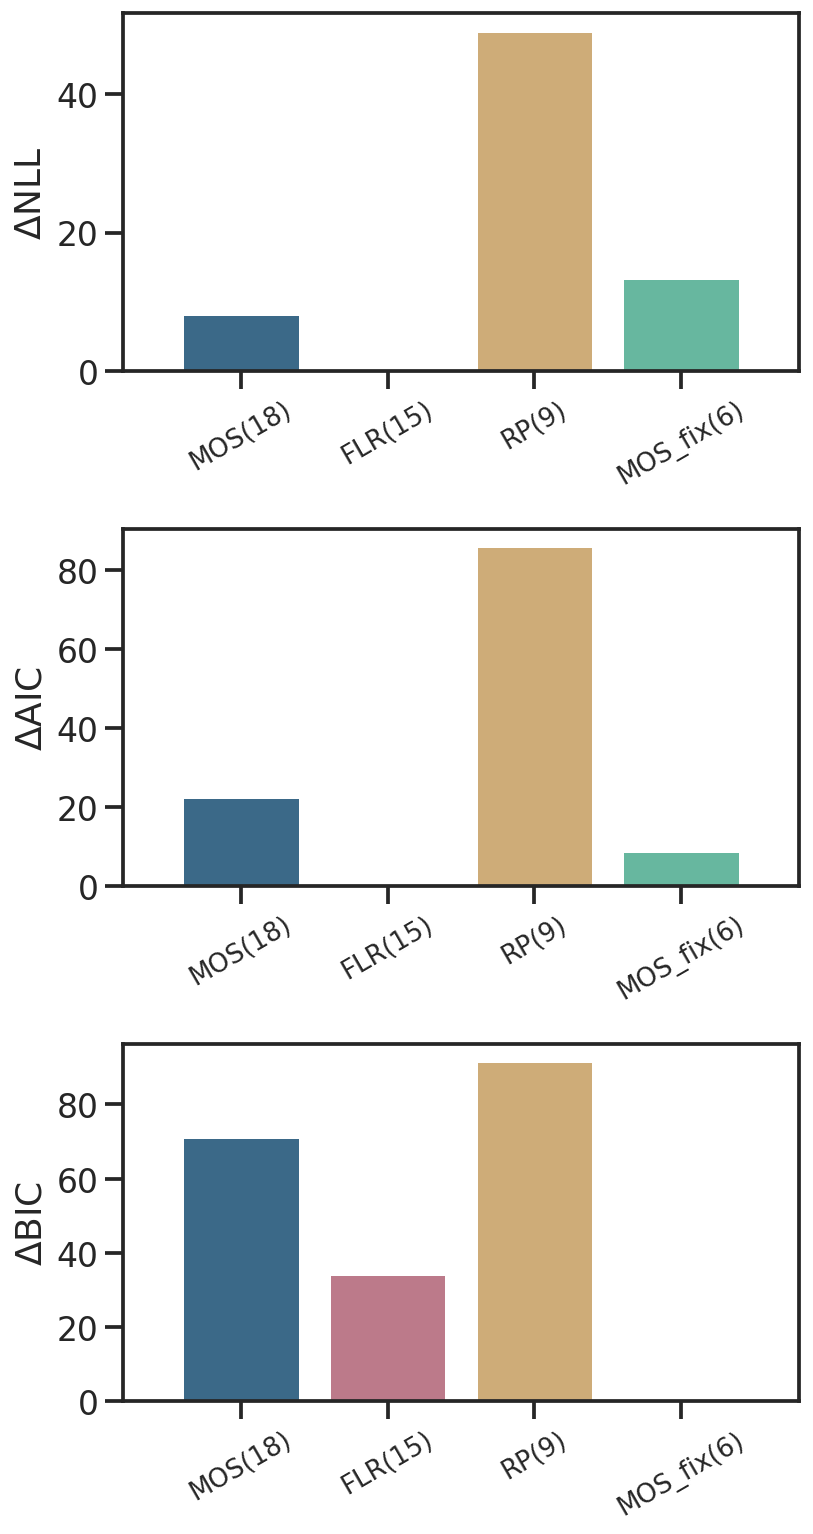

In [ ]:
quantTable('exp1data-FLR', agents=['MOS', 'FLR', 'RP', 'MOS_fix'])

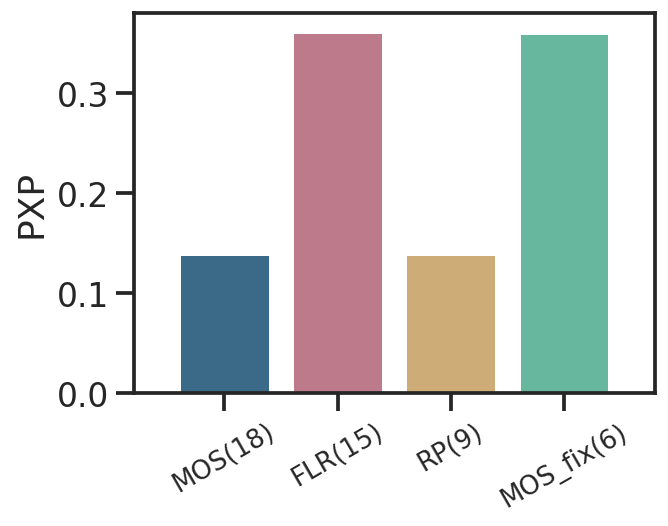

In [ ]:
show_bms('exp1data-FLR', models=['MOS', 'FLR', 'RP', 'MOS_fix'])

# Recover RP

MOS(18) nll: 413.036, aic: 862.072, bic: 948.515
FLR(15) nll: 404.757, aic: 839.514, bic: 911.549
RP(9) nll: 453.887, aic: 925.775, bic: 968.996
MOS_fix(6) nll: 418.181, aic: 848.363, bic: 877.177


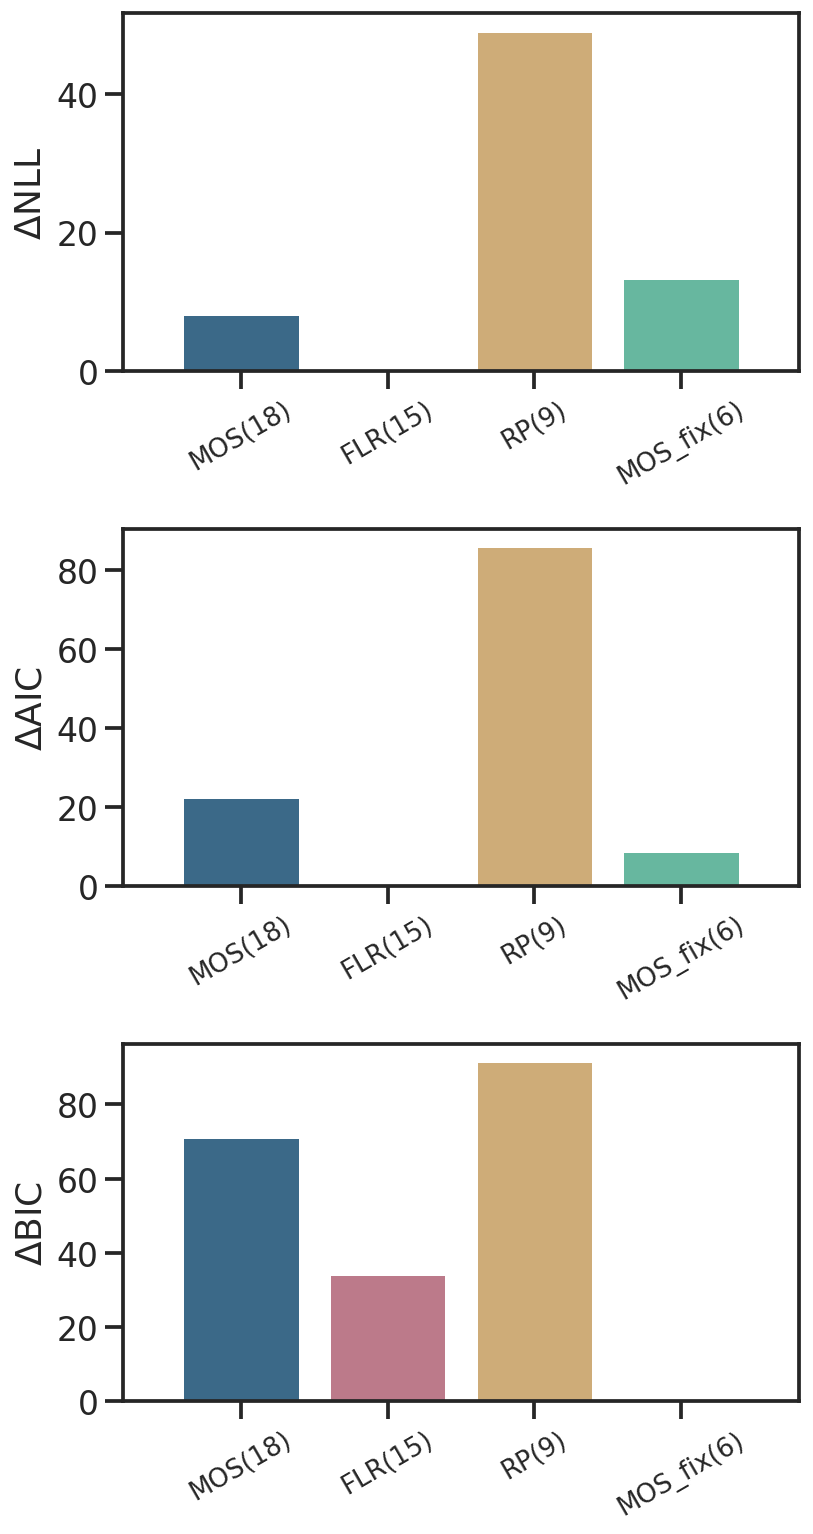

In [ ]:
quantTable('exp1data-RP', agents=['MOS', 'FLR', 'RP', 'MOS_fix'])

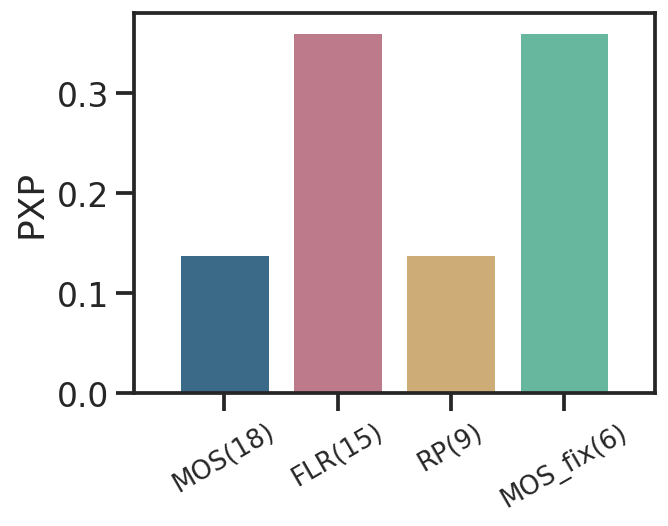

In [ ]:
show_bms('exp1data-RP', models=['MOS', 'FLR', 'RP', 'MOS_fix'])